<a href="https://colab.research.google.com/github/mgxbreu/collective_intelligence/blob/main/ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx

In [ ]:
class Graph:

  def __init__(self, node_count):
    self.matrix = np.full((node_count, node_count), np.inf)
  
  def add_edge(self, first_index, second_index, distance, is_directed=False):
    self.matrix[first_index, second_index] = distance
    if not is_directed: self.matrix[second_index, first_index] = distance
  
  def to_networkx(self):
    graph_x = nx.Graph()
    for row in range(self.matrix.shape[0]):
      for column in range(self.matrix.shape[1]):
        if self.matrix[row, column] != np.inf:
          graph_x.add_edge(row, column, weight=self.matrix[row, column])
    position = nx.spring_layout(graph_x)
    labels = nx.get_edge_attributes(graph_x, 'weight')
    nx.draw_networkx(graph_x, pos=position, with_labels=True)
    nx.draw_networkx_edge_labels(graph_x, position, edge_labels=labels)


In [ ]:
nodes = 5
graph = Graph(nodes)
graph.add_edge(0,1,4)
graph.add_edge(0,2,8)
graph.add_edge(0,3,4)
graph.add_edge(0,4,1)
graph.add_edge(1,2,3)
graph.add_edge(1,3,2)
graph.add_edge(1,4,2)
graph.add_edge(2,3,7)
graph.add_edge(2,4,9)
graph.add_edge(3,4,3)

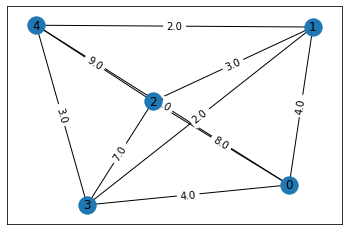

In [ ]:
graph.matrix
graph.to_networkx()

In [ ]:
distance= graph.matrix
# print(distance)
#tau
pheromones = np.ones(distance.shape)
#tau_delta
pheromones_quantity = np.zeros(distance.shape)
neta = 1/distance

## Hyper params
alpha = 1
beta = 1
#evaporation rate
rho = 0.5
max_iterations = 4
ants = 2

initial_state = 0


for iteration in range(max_iterations):
  for ant in range(ants):
    path = []
    unvisited = [node for node in range(distance.shape[0])]
    current_node = initial_state
    unvisited.remove(current_node)
    path.append(current_node)
    while len(unvisited) != 0:
      weight = pheromones**alpha * neta**beta
      unvisited_weight_matrix = weight[unvisited]
      likelihood = unvisited_weight_matrix/sum(unvisited_weight_matrix)
      current_node = np.random.choice(unvisited, p=likelihood[:, current_node])
      unvisited.remove(current_node)
      path.append(current_node)
    path.append(initial_state)
    total_distance = 0
    for node in range(len(path)-1):
      total_distance += distance[path[node], path[node + 1]]

    total_pheromones = 1/total_distance
    for node in range(len(path)-1):
      pheromones_quantity[path[node], path[node + 1]] += total_pheromones
    # print(f"Ant {ant} path: {path}. Total distance: {total_distance}. Total pheromones: {total_pheromones}")
    
  pheromones = (1 - rho) * pheromones + pheromones_quantity
  

<ipython-input-68-186969daec90>:30: RuntimeWarning: invalid value encountered in true_divide
  likelihood = unvisited_weight_matrix/sum(unvisited_weight_matrix)


In [ ]:
best_route = list(pheromones.argmax(axis=1))

In [ ]:
best_route_path = list(zip([node for node in range(distance.shape[0])], best_route))

In [ ]:
best_route_path

[(0, 4), (1, 2), (2, 0), (3, 1), (4, 3)]